In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Preprocesamieto de los datos

Consigna 1.- Leer los datos del archivo tabla nutricional.csv. Completar las
celdas faltantes con ceros. Poner todos los datos en la misma unidad.



In [2]:
#importación de datos
tabla_nutricional = pd.read_csv('tabla_nutricional.csv', sep=';')

#remplazo de valores nulos por 0
tabla_nutricional.fillna(0, inplace=True)

#alimentos = tabla_nutricional['Alimento'] #guardo los alimentos
#tabla_nutricional = tabla_nutricional.drop('Alimento', axis='columns') #saco los alimentos para tener sólo números
#tabla_nutricional = tabla_nutricional.mul(100 / tabla_nutricional['Cantidad (gr/ml)'], axis=0) #obtengo todas las filas a 100 gr
#tabla_nutricional['Alimento'] = alimentos # agrego alimentos devuelta
#tabla_nutricional = tabla_nutricional[['Alimento'] + [col for col in tabla_nutricional.columns] if col != ['Alimento']] #reordeno
cols = tabla_nutricional.columns # Na (mg);Ca (mg);Fe (mg);
tabla_nutricional['Na (gr)'] = tabla_nutricional['Na (mg)']/1000  #divido por mil las columnas con mg para obtener gr
tabla_nutricional['Ca (gr)'] = tabla_nutricional['Ca (mg)']/1000
tabla_nutricional['Fe (gr)'] = tabla_nutricional['Fe (mg)']/1000
cols_to_drop = [col for col in cols if 'mg' in col] #elimino las columnas con mg
tabla_nutricional.drop(cols_to_drop, axis=1, inplace=True)

tabla_nutricional.head()

,Alimento,Cantidad (gr/ml),HC (gr),Proteinas (gr),Grasas (gr),Azucares Libres (gr),AGS (gr),AGNI (gr),AG p (gr),Fibra (gr),Na (gr),Ca (gr),Fe (gr)
0,Leche fluida entera,270.00,12.42,8.37,7.83,0.0,4.99,2.19,0.520,0.0,0.15390,0.28350,0.000189
1,Leche entera en polvo,11.00,4.51,2.84,2.73,0.0,1.62,0.77,0.060,0.0,0.04444,0.09900,0.000060
2,Yogurt,19.00,2.45,0.51,0.49,0.0,0.32,0.14,0.014,0.0,0.00799,0.01767,0.000005
3,Queso crema,1.66,0.06,0.10,0.37,0.0,0.36,0.11,0.010,0.0,0.00123,0.00093,0.000000
4,Queso cuartirolo,3.66,0.06,0.77,0.80,0.0,0.76,0.21,0.020,0.0,0.02084,0.01654,0.000000


In [3]:
#ante la duda, como el total de gramos en la tabla de la canasta básica es 1897g, casi 2kg, 
#asumimos que efectivamente representa la necesidad nutricional de 1 día
col_sums = tabla_nutricional.drop('Alimento', axis='columns').sum().to_numpy()
col_sums[3]

76.911

Consigna 2.- Desarrollar una funci´on que reciba como par´ametro un DataFrame y que eval´ue si las cantidades de los principales elementos de la dieta, prote´ınas, carbohidratos, grasas, sodio, fibra, frutas y verduras, cumple los m´argenes
de ingesta de la OMS. Esta funci´on debe devolver VERDADERO si los cumple.
Verificar la Canasta B´asica con esta funci´on.

**TODO: Preguntar si efectivamente la función tiene que dar true, y las condiciones uno a uno también.**

**Sodio tiene que dar igual? Más de 200? 10% de tolerancia?**

- Es por día??????
- Cómo sería los gr/ml?

In [4]:
"""
Recibe como parámetro un DataFrame y evalúa si las cantidades de los principales elementos de la dieta, 
proteínas, carbohidratos, grasas, sodio, fibra, frutas y verduras, 
cumple los márgenes de ingesta de la OMS:
Proteinas 10-15 %
Carbohidratos totales 55-75 %b (bruto)
Grasas totales 15-30 %
Sodio 200 mg/dia
Fibra alimentaria total >25 g/dia
Frutas y verduras >= 400 g/dia
"""
def oms_check (df:pd.DataFrame):

    #sumamos cada columna de nutriente y la guardamos en un array (sin la de alimentos)
    nutrientes_totales = df.drop('Alimento', axis='columns').sum().to_numpy()
    #listamos manualmente las frutas y verduras de la lista de alimentos
    lista_fru_y_ver = ['Acelga', 'Zanahoria', 'Tomate', 'Lechuga', 'Cebolla', 'Zapallo', 'Manzana', 'Naranja', 'Mandarina', 'Pera', 'Banana', 'Papa', 'Batata']
    #lista de columnas
    cols = df.columns
    #buscamos el indice de cada columna en el dataframe
    proteinas_index = cols.get_loc('Proteinas (gr)')
    hc_index = cols.get_loc('HC (gr)')
    grasas_index = cols.get_loc('Grasas (gr)')
    sodio_index = cols.get_loc('Na (gr)')
    fibra_index = cols.get_loc('Fibra (gr)')
    cantidad_index = cols.get_loc('Cantidad (gr/ml)')

    #guardamos los datos de nutrientes con el indice obtenido
    cantidad = nutrientes_totales[cantidad_index]
    #guardamos directamente los porcentajes sobre el total cuando ese es el dato que nos importa
    proteinas = (nutrientes_totales[proteinas_index]*100)/cantidad
    hc = (nutrientes_totales[hc_index]*100)/cantidad
    grasas = (nutrientes_totales[grasas_index]*100)/cantidad
    sodio = nutrientes_totales[sodio_index]
    fibra = nutrientes_totales[fibra_index]
    #filtramos las frutas y verduras, seleccionamos la columna de cantidad en mg y sumamos
    fru_y_ver = df[df['Alimento'].isin(lista_fru_y_ver)]['Cantidad (gr/ml)'].sum()

    #generate a dictionary with the results
    results = {'Proteinas': proteinas, 
               'HC': hc, 'Grasas': grasas, 
               'Sodio': sodio, 'Fibra': fibra, 
               'Frutas y Verduras': fru_y_ver}
    
    print(results)

    # for 10 < proteinas < 15 and 55 < hc < 75 and 15 < grasas < 30 and 190 < sodio < 210 and fibra > 25000 and fru_y_ver >= 400000 print an array of trues and false
    print([10 < proteinas < 15, 55 < hc < 75, 15 < grasas < 30, 0.19 < sodio < 0.21, fibra > 25, fru_y_ver >= 400])

    #finalizamos chequeando que las condiciones dadas de la OMS se cumplan efectivamente (para los 200mg de sodio damos un 10% de tolerancia ya que es difícil que nos de exactamente ese valor)
    return 10 < proteinas < 15 and 55 < hc < 75 and 15 < grasas < 30 and 0.19 < sodio < 0.21 and fibra > 25 and fru_y_ver >= 400


oms_check(tabla_nutricional)

{'Proteinas': 18.748034663058977, 'HC': 27.402098797030963, 'Grasas': 13.83353443757846, 'Sodio': 0.71888, 'Fibra': 3.337714, 'Frutas y Verduras': 634.0}
[False, False, False, False, False, True]


False

### Análisis en Componentes Principales

Consigna 3.- Realizar un An´alisis en Componentes Principales (ACP), tomando
el valor nutricional de cada alimento por gramo. Graficar cada alimento como un
punto en ejes coordenados del nuevo espacio creado por los autovectores generadores del ACP. En este gr´afico, analizar los clusteres que quedan planteados por
la proyecci´on.

In [5]:
#copiamos la función del Labo 7 y hacemos algunas modificaciones a la tabla nutricional para que funcione correctamente
alimentos = tabla_nutricional['Alimento'] #guardo los alimentos
alimentos_arr = alimentos.to_numpy()
#sacamos los alimentos para tener sólo números y convertimos a numpy para obtener una matriz
tabla_nutricional_matriz = tabla_nutricional.copy()
tabla_nutricional_matriz = tabla_nutricional_matriz.drop('Alimento', axis='columns')
tabla_nutricional_matriz = tabla_nutricional_matriz.to_numpy() 
tabla_nutricional_matriz = tabla_nutricional_matriz.T #transponemos la tabla para que las columnas sean los alimentos

def calculoACP(data):
    d, n = data.shape # d, 1444 es la dimensión de los datos, n, 380 es la cantidad de datos
    m=np.mean(data, axis=1) #calculamos la media de los datos por columnas, para cada dimensión (x1, ... xd)
    # np.tile repite la media m, n veces, para que tenga la misma dimensión que data
    # luego la restamos a data
    X = data - np.tile(m.reshape((len(m), 1)), (1, n))
    # calculamos la matriz de covarianza, que es X*X^T/n ya que 
    Mcov = np.dot(X,X.T) / n # Covariance Matrix

    D, V = np.linalg.eigh(Mcov)

    # ordenamos los autovalores de mayor a menor
    idx = np.argsort (- D )
    D = D[idx]
    V = V[:, idx]

    return D, V, X, m

D, V, X, m = calculoACP(tabla_nutricional_matriz)



Cantidad de autovectores de representación al 99 %:  3


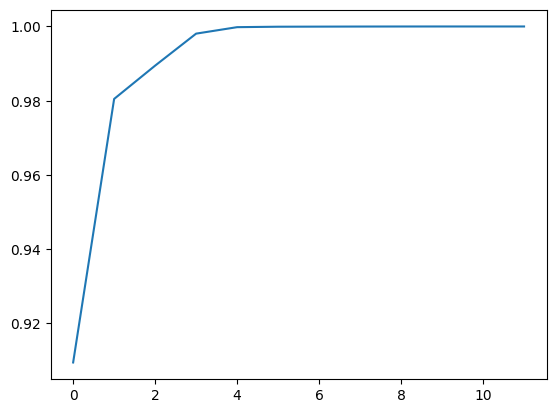

In [6]:
ratio = np.cumsum(D) / np.sum(D)
plt.plot(ratio)
plt.plot(np.cumsum(D[100:])/ np.sum(D))
x = np.where(ratio > 0.99)[0]
M = x[0]

print('Cantidad de autovectores de representación al 99 %: ', M)


Cantidad de datos:  57 Cantidad de dimensiones:  12


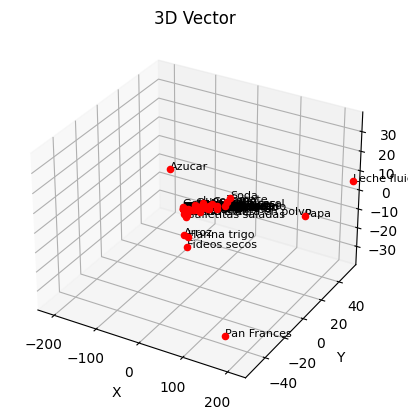

In [8]:
#proyección de los datos en el espacio de dimensión M
len, cantidad = X.shape
print('Cantidad de datos: ', cantidad, 'Cantidad de dimensiones: ', len)

proyecciones = np.zeros((cantidad, M))

# Create the figure and axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(cantidad):
    proyecciones[i, :] = X[:,i] @ V[:,0:M]

    # Plot the vector as a point
    ax.scatter(proyecciones[i, 0], proyecciones[i, 1], proyecciones[i, 2], c='r', marker='o')
    ax.text(proyecciones[i, 0], proyecciones[i, 1], proyecciones[i, 2], alimentos_arr[i], size=8, zorder=1, color='k')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Vector')

# Set limits for the axes
ax.set_xlim([-max(proyecciones[:, 0]), max(proyecciones[:, 0])])
ax.set_ylim([-max(proyecciones[:, 1]), max(proyecciones[:, 1])])
ax.set_zlim([-max(proyecciones[:, 2]), max(proyecciones[:, 2])])

# Show the plot
plt.show()

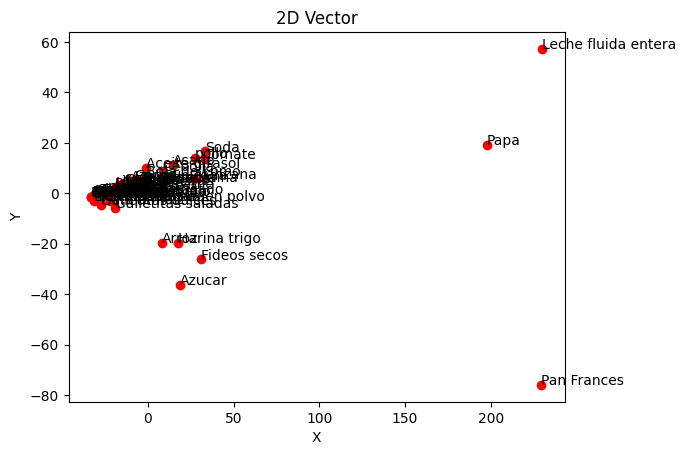

In [ ]:
# Create the figure and axis
fig, ax = plt.subplots()

for i in range(cantidad):
    proyecciones[i, :] = X[:,i] @ V[:,0:M]

    # Plot the vector as a point
    ax.scatter(proyecciones[i, 0], proyecciones[i, 1], c='r', marker='o')
    ax.annotate(alimentos_arr[i], (proyecciones[i, 0], proyecciones[i, 1]))

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('2D Vector')

# Show the plot
plt.show()

### Aumentos de Precios

Consigna 4.- Proyectar los alimentos de la tabla de Consumidores libres en el
espacio de generadores del ACP.

[33, 27, 44, 30, 28, 6, 26, 0, 56, 16, 17, 19, 31, 22, 21, 11, 7, 8, 10]


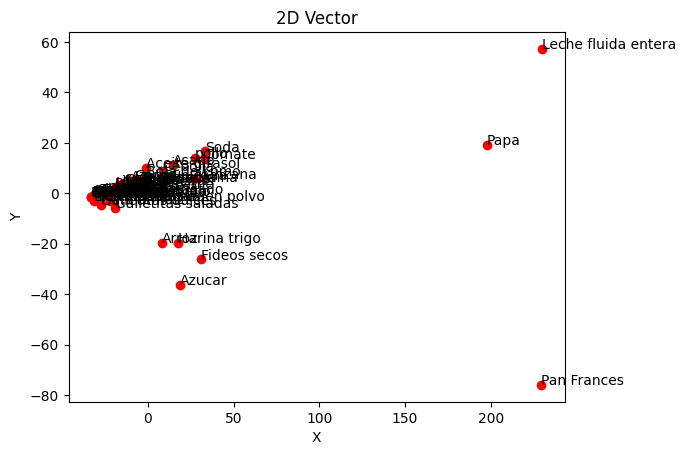

In [28]:
consumidores_libres = pd.read_csv('consumidores_libres.csv', sep=';')

consumidores_libres.head()

productos = ['Aceite girasol', 'Arroz', 'Azucar', 'Fideos secos', 'Harina trigo', 'Huevo', 'Pan Frances', 'Leche fluida entera', 'Yerba', 'Zanahoria', 'Tomate', 'Cebolla', 'Papa', 'Naranja', 'Manzana', 'Bola de Lomo', 'Asado', 'Paleta ', 'Carne picada']

#productos_consumidores = tabla_nutricional[tabla_nutricional['Alimento'].isin(productos)]
#sacamos los alimentos para tener sólo números y convertimos a numpy para obtener una matriz, luego trasponemos para tener los valores en columnas
#productos_consumidores_matriz = productos_consumidores.drop('Alimento', axis='columns').to_numpy().T

#proyección de los datos en el espacio de dimensión M = 2

producto_indices = []

for producto in productos:
    index = np.where(alimentos_arr == producto)[0]
    if index.size > 0:
        producto_indices.append(index[0])
    else:
        print(f"Producto {producto} no encontrado en alimentos_arr")

print(producto_indices)
# Create the figure and axis
fig, ax = plt.subplots()

for i in range(cantidad):
    proyecciones[i, :] = X[:,i] @ V[:,0:M]

    # Plot the vector as a point
    ax.scatter(proyecciones[i, 0], proyecciones[i, 1], c='r', marker='o')
    ax.annotate(alimentos_arr[i], (proyecciones[i, 0], proyecciones[i, 1]))

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('2D Vector')

# Show the plot
plt.show()

- Qué hacemos con los alimentos que no están en la CBA?

### Mínimos Cuadrados